##***Heart Disease Prediction with Logistic Regression***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Read the heart dataset
heart_data = pd.read_csv('/content/heart_disease.csv')
heart_data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
#shape of data
heart_data.shape

(297, 14)

## ***Exploratory Data Analysis (EDA)***

In [7]:
# Check for missing values
missing_values = heart_data.isnull().sum()
print("Missing Values:",missing_values)

Missing Values: age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64


In [25]:
# Treat missing values if any
# In this example, we'll simply drop rows with missing values
heart_data.dropna(inplace=True)

In [27]:
#check missing value after treatment
missing_values = heart_data.isnull().sum()
print("Missing Values:",missing_values)

Missing Values: age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64


In [30]:
#check the data information
print("Data Quality Check:")
print(heart_data.info())

Data Quality Check:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              297 non-null    float64
 1   gender           297 non-null    float64
 2   cp               297 non-null    float64
 3   trestbps         297 non-null    float64
 4   chol             297 non-null    float64
 5   fbs              297 non-null    float64
 6   restecg          297 non-null    float64
 7   thalach          297 non-null    float64
 8   exang            297 non-null    float64
 9   oldpeak          297 non-null    float64
 10  slope            297 non-null    float64
 11  ca               297 non-null    float64
 12  thal             297 non-null    float64
 13  heart_diagnosis  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


##***Transform the categorical data***

In [10]:
# Check for categorical variables
categorical_columns = heart_data.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("Categorical Variables:")
    print(categorical_columns)
else:
    print("No categorical variables found.")

No categorical variables found.


In [57]:
# Summary of numerical columns after converting categorical data
print(heart_data.describe().round(1))

         age  gender     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count  297.0   297.0  297.0     297.0  297.0  297.0    297.0    297.0  297.0   
mean    54.5     0.7    3.2     131.7  247.4    0.1      1.0    149.6    0.3   
std      9.0     0.5    1.0      17.8   52.0    0.4      1.0     22.9    0.5   
min     29.0     0.0    1.0      94.0  126.0    0.0      0.0     71.0    0.0   
25%     48.0     0.0    3.0     120.0  211.0    0.0      0.0    133.0    0.0   
50%     56.0     1.0    3.0     130.0  243.0    0.0      1.0    153.0    0.0   
75%     61.0     1.0    4.0     140.0  276.0    0.0      2.0    166.0    1.0   
max     77.0     1.0    4.0     200.0  564.0    1.0      2.0    202.0    1.0   

       oldpeak  slope     ca   thal  heart_diagnosis  risk_score  
count    297.0  297.0  297.0  297.0            297.0       297.0  
mean       1.1    1.6    0.7    4.7              0.9       149.7  
std        1.2    0.6    0.9    1.9              1.2        22.9  
min        

##Add a new column for patient IDs(create unique id)

In [38]:
# Add a new column for patient IDs
import uuid
heart_data['patient_id'] = [str(uuid.uuid4())[:5] for _ in range(len(heart_data))]

In [39]:
heart_data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis,patient_id
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,dbca6
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,8a60b
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,a7d3c
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,a1616
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,f97ef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,72bbf
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,62324
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,9d6e3
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,8b395


#***#spliting data into train and test data***

In [41]:
# Separate features (X) and target variable (y)
X = heart_data.drop(columns=['heart_diagnosis', 'patient_id'])
y = heart_data['heart_diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Apply Logistic Regression model

In [43]:
# Apply Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## ***Print the model results***

In [44]:
print("Logistic Regression Model Results:")
print("Accuracy on training set:", model.score(X_train_scaled, y_train))
print("Accuracy on test set:", model.score(X_test_scaled, y_test))

Logistic Regression Model Results:
Accuracy on training set: 0.6751054852320675
Accuracy on test set: 0.6166666666666667


In [45]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

##Evaluate the Model:-

In [46]:
# Print confusion matrix and classification report
print("Confusion Matrix:--")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:--")
print(classification_report(y_test, y_pred))

Confusion Matrix:--
[[34  1  0  1  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 1  1  0  1  0]]
Classification Report:--
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60



In [47]:
# Get the feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
     Feature  Importance
7    thalach    0.453730
5        fbs    0.289267
0        age   -0.085892
4       chol   -0.200821
8      exang   -0.241747
6    restecg   -0.308447
9    oldpeak   -0.381804
10     slope   -0.388524
3   trestbps   -0.482963
12      thal   -0.490244
1     gender   -0.570414
2         cp   -0.646882
11        ca   -1.090033


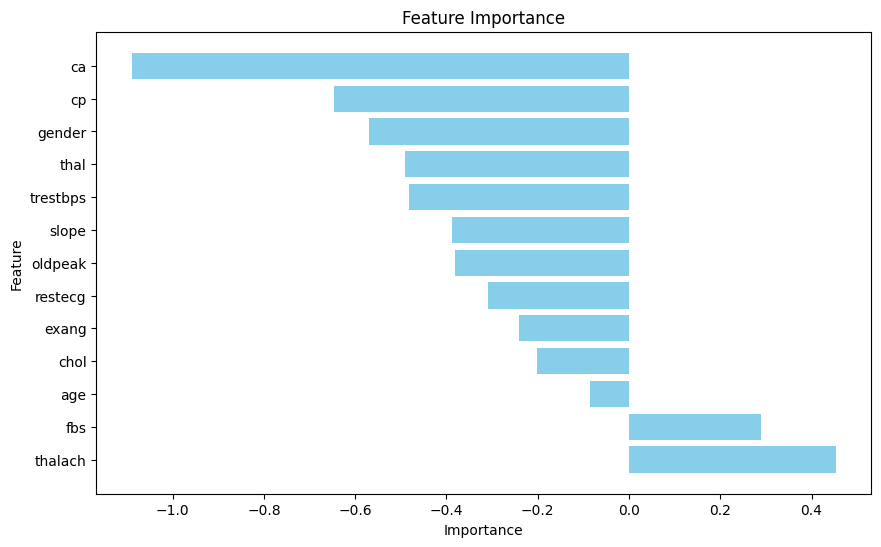

In [48]:
# Plot feature importance that impact on heart disease
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Based on the feature importance analysis provided:

1. **Positive Impact Features**:
   - Features such as ***'thalach'*** (maximum heart rate achieved) and **'fbs' **(fasting blood sugar) have positive importance values. This suggests that higher values of these features are associated with an increased likelihood of heart disease.

2. **Negative Impact Features**:
   - Features such as ***'age***', ***'chol'*** (serum cholesterol), ***'exang'*** (exercise induced angina),*** 'restecg'*** (resting electrocardiographic results), ***'oldpeak'*** (ST depression induced by exercise relative to rest), ***'slope'*** (slope of the peak exercise ST segment), '***trestbps'*** (resting blood pressure),*** 'thal'*** (thalassemia), 'gender'***, 'cp'*** (chest pain type), and ***'ca'*** (number of major vessels colored by fluoroscopy) have negative importance values. This suggests that lower values of these features are associated with an increased likelihood of heart disease.

###***predict the patient with a high risk of heart disease future:-***
-By using feature importance to predict the likelihood of heart disease in potential patients, healthcare professionals can identify high-risk individuals and intervene with appropriate treatments promptly.

In [55]:
# Assuming 'thalach' and 'fbs' are the most important features
most_important_features = ['thalach', 'fbs']

# Calculate risk scores for each patient based on the value of the most important feature(s)
heart_data['risk_score'] = heart_data[most_important_features].sum(axis=1)  # Sum of thalach and fbs values

# Sort patients based on their risk scores
patients_high_risk = heart_data.sort_values(by='risk_score', ascending=False)

# Display patients with the highest risk of heart disease
print("Patients with High Risk of Heart Disease:")
print(patients_high_risk[['patient_id', 'risk_score']].head(10))

Patients with High Risk of Heart Disease:
    patient_id  risk_score
132      32833       202.0
188      95dbb       195.0
186      182f0       195.0
225      68674       192.0
112      22446       190.0
53       f6ae7       188.0
3        a1616       187.0
133      da562       186.0
99       6c8dd       186.0
100      562de       185.0


##conclusion on feature impotance:-
- Building a logistic regression model using the provided dataset and considering the feature importance insights can aid in predicting whether a patient has heart disease or not. Additionally, understanding the relative importance of each feature can guide healthcare decision-making and improve patient outcomes.\
-The feature importance analysis highlights the key factors influencing heart disease prediction. By understanding the impact of each feature, healthcare professionals can prioritize interventions and treatments for patients at higher risk of heart disease based on their individual characteristics.